In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2s
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [43]:
inflation = pd.read_csv('Initial Data.csv', index_col="Period")
inflation.head()

,Yield Curve,Production Index,Housing Starts,Cost of Living Index,Unemployment,Consumer Price Index
Period,,,,,,
Jan.00,0.62,96.01601,118.4,1466,10.1,98.0
Feb.00,0.53,96.31606,118.2,1476,10.2,98.8
Mar.00,0.45,95.51592,118.4,1485,10.2,99.3
Apr.00,0.22,97.01617,119.3,1490,10.0,99.6
May.00,0.11,101.21690,120.5,1497,9.8,99.9


In [44]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, Jan.00 to Jan.23
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Yield Curve           277 non-null    float64
 1   Production Index      277 non-null    float64
 2   Housing Starts        277 non-null    float64
 3   Cost of Living Index  277 non-null    int64  
 4   Unemployment          277 non-null    float64
 5   Consumer Price Index  277 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 15.1+ KB


In [45]:
corr = inflation.corr()

print (corr)

                      Yield Curve  Production Index  Housing Starts  \
Yield Curve              1.000000         -0.454680       -0.284705   
Production Index        -0.454680          1.000000        0.670288   
Housing Starts          -0.284705          0.670288        1.000000   
Cost of Living Index     0.083031          0.299675        0.206494   
Unemployment             0.265917         -0.809726       -0.553677   
Consumer Price Index     0.083586          0.299384        0.206322   

                      Cost of Living Index  Unemployment  Consumer Price Index  
Yield Curve                       0.083031      0.265917              0.083586  
Production Index                  0.299675     -0.809726              0.299384  
Housing Starts                    0.206494     -0.553677              0.206322  
Cost of Living Index              1.000000     -0.410907              0.999982  
Unemployment                     -0.410907      1.000000             -0.410423  
Consumer Price I

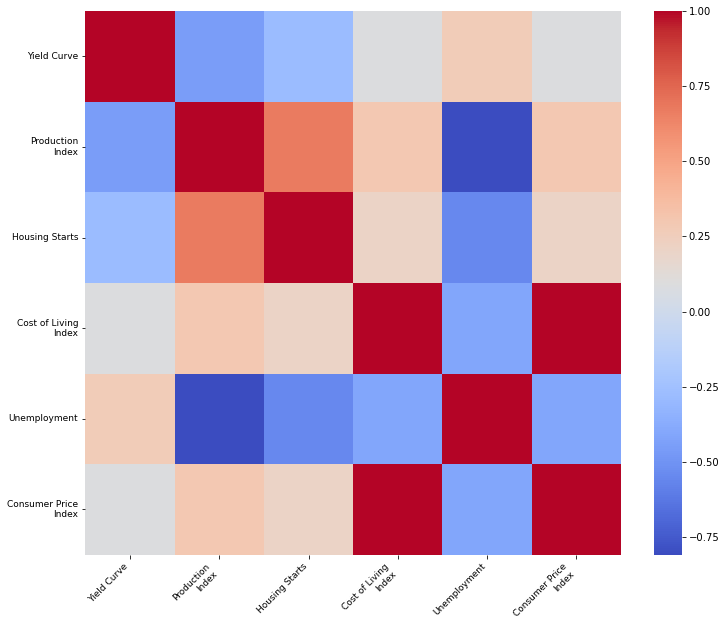

In [46]:
import seaborn as sns
import textwrap

fig, ax = plt.subplots(figsize=(12,10))

heatmap = sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f')
xlabels = [textwrap.fill(label.get_text(), 15) for label in ax.get_xticklabels()]
ax.set_xticklabels(xlabels)

# Wrap the y-axis labels
ylabels = [textwrap.fill(label.get_text(), 15) for label in ax.get_yticklabels()]
ax.set_yticklabels(ylabels)

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, fontsize=9, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=9)
plt.savefig('heatmap_pre.png', dpi=300)

In [47]:
X = inflation.drop('Consumer Price Index', axis=1)
y = inflation['Consumer Price Index']


#creating the x and y value for the dataset and creating a test and training set from them

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = MinMaxScaler()
scaler.fit (X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
heading = X.columns.tolist()
print (heading)

['Yield Curve', 'Production Index', 'Housing Starts', 'Cost of Living Index', 'Unemployment']


In [49]:
inflation_tree = DecisionTreeRegressor(random_state=42, max_depth=11, min_samples_leaf=1, criterion='mse', splitter='best')

inflation_tree.fit(X_train_scaled, y_train)

y_pred_decision = inflation_tree.predict(X_test_scaled)
mse_tree = mse(y_test, y_pred_decision)
mae_tree = mae(y_test, y_pred_decision)
rsq_tree = r2s(y_test, y_pred_decision)
print ('MSE of Decision Tree: ', mse_tree)
print ('MAE of Decision Tree', mae_tree)
print ('R-Squared of Decision Tree', rsq_tree)

#best decision tree

MSE of Decision Tree:  0.17828571428571438
MAE of Decision Tree 0.254285714285713
R-Squared of Decision Tree 0.9989019762554627


In [50]:
feature_importances = inflation_tree.feature_importances_
list = []

for feat in feature_importances:
    list.append(feat)
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')
print (list)

Yield Curve: 0.0013436956907405652
Production Index: 0.0816997575179843
Housing Starts: 0.0007713327945758155
Cost of Living Index: 0.9160446619871553
Unemployment: 0.00014055200954400876
[0.0013436956907405652, 0.0816997575179843, 0.0007713327945758155, 0.9160446619871553, 0.00014055200954400876]


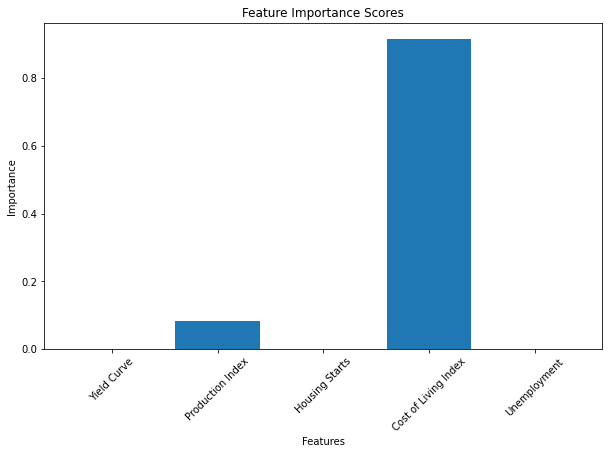

In [51]:
plt.figure(figsize=(10,6))
plt.bar(X.columns, list)
plt.title("Feature Importance Scores")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

In [52]:
inflation_random = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=10, min_samples_leaf=1, max_features='auto')
inflation_random.fit(X_train, y_train)
y_pred_rand = inflation_random.predict(X_test)
mse_rand = mse(y_test, y_pred_rand)
mae_rand = mae(y_test, y_pred_rand)
r2 = r2s(y_test, y_pred_rand)
print ('MSE of Random Forest:',mse_rand )
print ('MAE of Random Forest:',mae_rand )
print ('R-squared', r2)
#best random forest

MSE of Random Forest: 0.2553169205601701
MAE of Random Forest: 0.24244551020409924
R-squared 0.9984275574614581


In [53]:
feature_importances = inflation_random.feature_importances_
list = []

for feat in feature_importances:
    list.append(feat)
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')
print (list)

Yield Curve: 0.0009921571662350917
Production Index: 0.04033258280321456
Housing Starts: 0.0039874164676719035
Cost of Living Index: 0.9536492100513766
Unemployment: 0.0010386335115019035
[0.0009921571662350917, 0.04033258280321456, 0.0039874164676719035, 0.9536492100513766, 0.0010386335115019035]


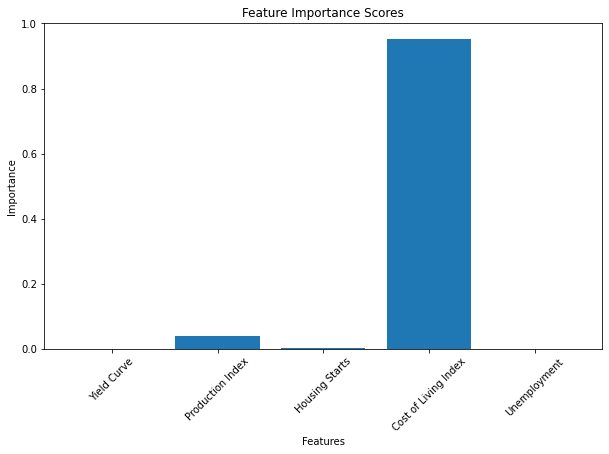

In [54]:
plt.figure(figsize=(10,6))
plt.bar(X.columns, list)
plt.title("Feature Importance Scores")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

In [55]:
#After manual tuning
from sklearn.linear_model import Lasso

inflation_lasso = Lasso(alpha=0.01, fit_intercept=True, max_iter=1000, normalize=False, random_state=42)
inflation_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = inflation_lasso.predict(X_test_scaled)
mse_lasso = mse(y_test, y_pred_lasso)
mae_lasso = mae(y_test, y_pred_lasso)
r2_lasso = r2s(y_test, y_pred_lasso)
print ('MSE of LASSO:',mse_lasso )
print ('MAE of LASSO Forest:',mae_lasso )
print ('R-Squared of Lasso', r2_lasso)
#best lasso

MSE of LASSO: 0.011009331479272933
MAE of LASSO Forest: 0.06671267319508647
R-Squared of Lasso 0.9999321958720913


In [56]:
feature_importances = np.abs(inflation_lasso.coef_)
list = []

for feat in feature_importances:
    list.append(feat)
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')
print (list)

Yield Curve: 0.0
Production Index: 0.0
Housing Starts: 0.0
Cost of Living Index: 51.913711043028655
Unemployment: 0.0
[0.0, 0.0, 0.0, 51.913711043028655, 0.0]


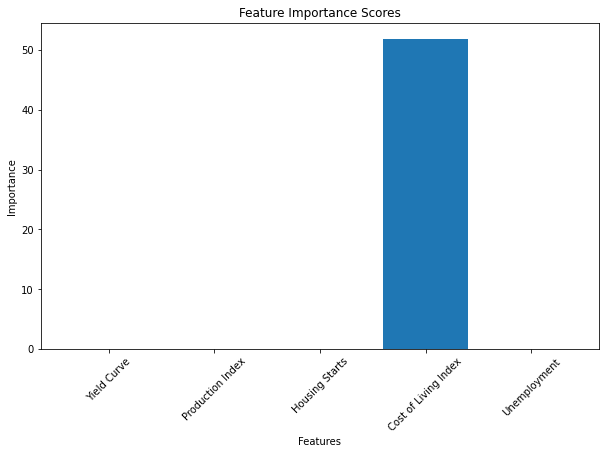

In [57]:
plt.figure(figsize=(10,6))
plt.bar(X.columns, list)
plt.title("Feature Importance Scores")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

In [58]:
from sklearn.svm import SVR

svr = SVR (C=10, epsilon=0.01, kernel='linear')

# Train the SVR model on the training data
svr.fit(X_train_scaled, y_train)

# Evaluate the performance of the model on the testing data
y_pred = svr.predict(X_test_scaled)
mse_svr = mse(y_test, y_pred)
mae_svr = mae(y_test, y_pred)
r2_svr = r2s(y_test, y_pred)

print('MSE:', mse_svr)
print('MAE:', mae_svr)
print('R-squared:', r2_svr)

#grid search SVR
#best SVR

MSE: 0.0070528073078013195
MAE: 0.04232232962774946
R-squared: 0.9999565632618371


In [59]:
feature_importances = np.abs(svr.coef_[0])
list = []

for feat in feature_importances:
    list.append(feat)
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')
print (list)

Yield Curve: 0.01749584536687432
Production Index: 0.03151440974998465
Housing Starts: 0.020515509524028808
Cost of Living Index: 52.102316293294976
Unemployment: 0.03707450385612243
[0.01749584536687432, 0.03151440974998465, 0.020515509524028808, 52.102316293294976, 0.03707450385612243]


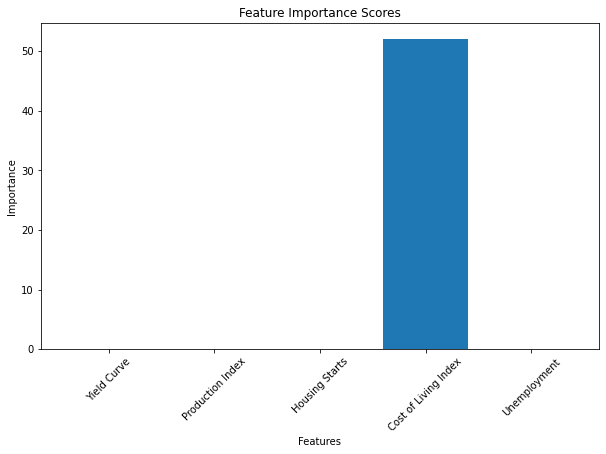

In [27]:
plt.figure(figsize=(10,6))
plt.bar(X.columns, list)
plt.title("Feature Importance Scores")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

In [60]:
import xgboost as xgb
from xgboost import plot_importance

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=5, min_child_weight=1)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xg = xgb_model.predict(X_test_scaled)
mse_xg = mse(y_test, y_pred_xg )
mae_xg = mae(y_test, y_pred_xg )
rsq_xg = r2s(y_test, y_pred_xg )
print('MSE: ', mse_xg)
print ('MAE: ', mae_xg)
print ('R-squared: ', rsq_xg)
#grid search XGB
#best XGB

MSE:  0.10679518863439053
MAE:  0.21838361467633893
R-squared:  0.9993422711775158


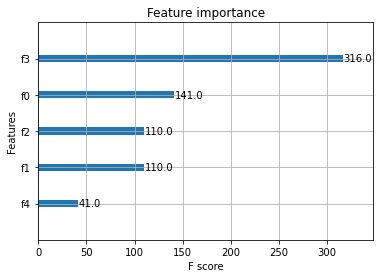

141

In [61]:
plot_importance(xgb_model)
plt.show()
141

In [62]:
importance_scores = xgb_model.get_booster().get_score(importance_type='weight')
print(importance_scores)


{'f0': 141.0, 'f1': 110.0, 'f2': 110.0, 'f3': 316.0, 'f4': 41.0}


Grid Search performed on Google Colab due to large runtime

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2s


# Train the artificial neural network
model = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='lbfgs', max_iter=4000, learning_rate='constant', alpha=0.01, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict the Consumer Price Index using the trained model
y_pred_mlp = model.predict(X_test_scaled)

# Calculate the Mean Squared Error
mse_mlp = mse(y_test, y_pred_mlp)
mae_mlp = mae(y_test, y_pred_mlp)
rsq_mlp = r2s(y_test, y_pred_mlp)

# Print the Mean Squared Error
print('Mean Squared Error: ', mse_mlp)
print('Mean Absolute Error: ', mae_mlp)
print('R-squared: ', rsq_mlp)

#grid search MLP
#best MLP

Mean Squared Error:  0.005138004622001014
Mean Absolute Error:  0.04378723011136917
R-squared:  0.9999683561237809


In [73]:
# get the feature importances
importances = model.coefs_[0].sum(axis=1)

# normalize the importances
importances /= importances.sum()

# print the importances
for feature, importance in zip(heading, importances):
    print(feature, importance)


Yield Curve -1.711141997028708
Production Index -0.9634929066789576
Housing Starts -0.7235900771315641
Cost of Living Index 4.611448463880618
Unemployment -0.21322348304138783
